In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, calinski_harabasz_score

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Create a copy of the dataframe
df = df_market_data.copy()
df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df)

# predict/transform
scaled_data = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index = df.index)

df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


In [7]:
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
# Startgin from 2 instead of 1 to allow for sillhouette scores 
k = list(range(2,12))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# Create an empty list to store the inertia values
inertia = []
# For Silhouette Scores
silhouettes = []
# Calinksi Harabasz Indices
chis = []

X = df_scaled
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Code borrowed from in class examples
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    ch = calinski_harabasz_score(X, preds)
    chis.append(ch)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [10]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "variance_score": chis}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)




,k,inertia,silhouette_score,variance_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754
9,11,24.964638,0.229807,31.488784,-3.200795


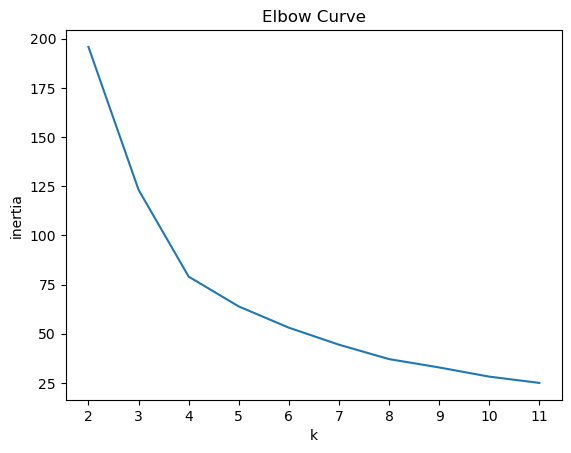

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

y1 = df_elbow["inertia"]

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** While there is some debate between 4 & 5 as the best value for k based on the elbow curve, silhouette score, and variance score, this analyst is recommending 4 by the elbow method. 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Fit the K-Means model using the scaled data
# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub = df_scaled.copy()
df_sub['clusters'] = preds

df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [13]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plot1 = df_sub.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols = "coin_id"
).opts(yformatter="%.2f")

plot1

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
n = 3
pca=PCA(n)

# Fit the PCA model
pca_data = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_data, columns = ["PCA: " + str(x) for x in range (1, n+1)])

df_pca.head()

,PCA: 1,PCA: 2,PCA: 3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


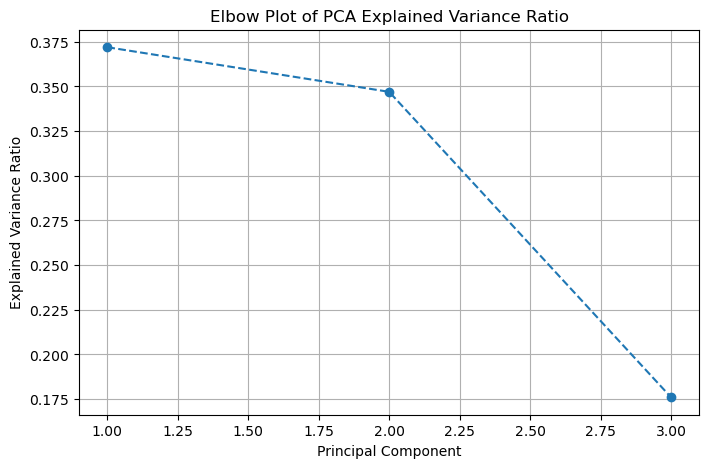

0.8950316570309842

In [15]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

# Total expalined variance
df2["Explained Variance Ratio"].sum()

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5% of the total explained variance is due to these three principal components. 

In [16]:
df_pca_new = df_pca.copy()

df_pca_new.head()
reindexing = list(df.index)
reindexing

# Set the coinid column as index
df_pca_new.index = reindexing

# Display sample data
df_pca_new.head()


,PCA: 1,PCA: 2,PCA: 3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [17]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2,12))

In [18]:
# Create an empty list to store the inertia values
inertia = []
# For Silhouette Scores
silhouettes = []
# Calinksi Harabasz Indices
chis = []

X = df_pca_new
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Code borrowed from in class examples
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    ch = calinski_harabasz_score(X, preds)
    chis.append(ch)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [19]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "variance_score": chis}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,variance_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.072792,0.359902,51.722281,-11.592705
4,6,27.720626,0.401468,57.865728,-10.352166
5,7,21.145312,0.372585,63.172223,-6.575314
6,8,17.208546,0.319029,65.656439,-3.936766
7,9,13.719376,0.372308,70.893808,-3.489169
8,10,10.559358,0.333616,80.347445,-3.160019
9,11,8.058822,0.361557,92.624679,-2.500536


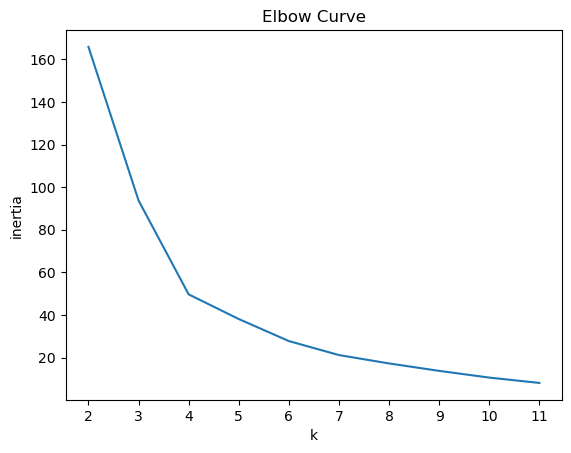

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

y2 = df_elbow["inertia"]

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4 remains the best value


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ, but the silhouette scores, variance score, and elbow plot have shifted slightly

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub2 = df_pca_new.copy()
df_sub2['clusters'] = preds

df_sub2.head()

,PCA: 1,PCA: 2,PCA: 3,clusters
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [22]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plot2 = df_sub2.hvplot.scatter(
    x="PCA: 1",
    y="PCA: 2",
    by="clusters",
    hover_cols = "index"
).opts(yformatter="%.2f")
plot2

:NdOverlay   [clusters]
   :Scatter   [PCA: 1]   (PCA: 2,index)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

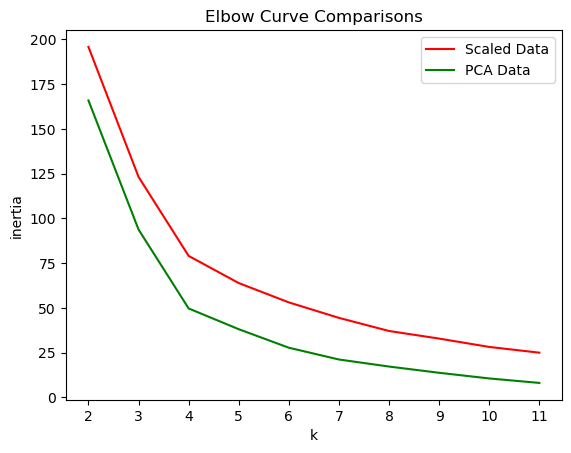

In [26]:
# Composite plot to contrast the Elbow curves
plt.plot(df_elbow["k"], y1, color = 'r')
plt.plot(df_elbow["k"], y2, color = 'g')
plt.title("Elbow Curve Comparisons")
plt.legend(labels = ["Scaled Data", "PCA Data"])
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

In [24]:
# Composite plot to contrast the clusters
comp_plot = plot1 + plot2
comp_plot


:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA: 1]   (PCA: 2,index)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using PCA analysis for feature engineering more clearly established an elbow at k=4, as well as also reduced the inertia (sum of errors squared) for the model. The lower inertia corresponds to a better fit model. This is emblematic of the complexity-explainability tradeoff; while PCA provides a better model, the components lose intuitive meaning. 